<a href="https://colab.research.google.com/github/mashaan14/YouTube-channel/blob/main/2023_11_17_SGD_line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# References


*   Hart, P. E., Stork, D. G., & Duda, R. O. (2000). Pattern classification. Hoboken: Wiley.
*   [Visualizing the gradient descent method](https://scipython.com/blog/visualizing-the-gradient-descent-method/)
*   [Stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)



In [30]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm

# True values
$y=2+0.5x$

In [31]:
# The data to fit
m = 20
a_true = 2
b_true = 0.5
x = np.linspace(-1,1,m)
y = a_true + b_true * x

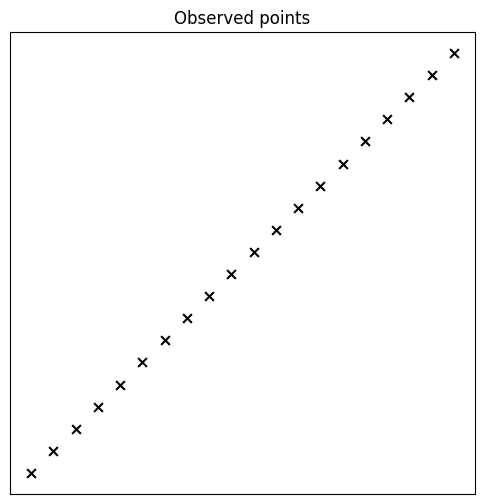

In [41]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x, y, marker='x', s=40, color='k')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title('Observed points')
ax.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,labelright=False);
ax.set(xlabel=None, ylabel=None)

plt.savefig('plot-points.png', bbox_inches='tight', dpi=600)

# Pridected values

$g_{\theta}(x)=\theta_{0}+\theta_{1}x$

In [33]:
def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

# Cost function

$J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}{(g_{\theta}(x^{(i)})-y^{(i)})}^2$

We'll take the average then we'll divide by 2

In [34]:
def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

# Optimization

The general rule of optimization is:
$\theta_{i}^{(t+1)} = \theta_{i}^{(t)} - \eta \frac{\partial J}{\partial \theta_{i}^{(t)}}$

where $\eta$ is the learning rate, and $\frac{\partial J}{\partial \theta_{i}}$ is the partial derivative with respect to $\theta_{i}$

---

Optimizing $\theta_{0}$:

$\theta_{0}^{(t+1)} = \theta_{0}^{(t)} - \eta \frac{\partial J}{\partial \theta_{0}^{(t)}}$

$\theta_{0}^{(t+1)} = \theta_{0}^{(t)} - \eta \frac{1}{2m}2\sum_{i=1}^{m}{((\theta_{0}+\theta_{1}x^{(i)})-y^{(i)})}$

$\theta_{0}^{(t+1)} = \theta_{0}^{(t)} - \eta \frac{1}{m}\sum_{i=1}^{m}{((\theta_{0}+\theta_{1}x^{(i)})-y^{(i)})}$

---

Optimizing $\theta_{1}$:

$\theta_{1}^{(t+1)} = \theta_{1}^{(t)} - \eta \frac{\partial J}{\partial \theta_{1}^{(t)}}$

$\theta_{1}^{(t+1)} = \theta_{1}^{(t)} - \eta \frac{1}{2m}2x\sum_{i=1}^{m}{((\theta_{0}+\theta_{1}x^{(i)})-y^{(i)})}$

$\theta_{1}^{(t+1)} = \theta_{0}^{(t)} - \eta \frac{1}{m}x\sum_{i=1}^{m}{((\theta_{0}+\theta_{1}x^{(i)})-y^{(i)})}$

In [35]:
# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 10
alpha = 0.7
theta = [np.array((0,0))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))

# Plots

In [ ]:
colors = cm.tab10.colors[:N]

for j in range(1,N):
  fig, ax = plt.subplots(figsize=(6,6))
  ax.scatter(x, y, marker='x', s=40, color='k')
  ax.set_xlabel(r'$x$')
  ax.set_ylabel(r'$y$')
  ax.set_title('True values')
  ax.plot(x, hypothesis(x, *theta[j]), color=colors[3], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[j]))
  ax.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,labelright=False);
  ax.set(xlabel=None, ylabel=None)
  plt.savefig('fit-plot-'+str(j)+'.png', bbox_inches='tight', dpi=600)

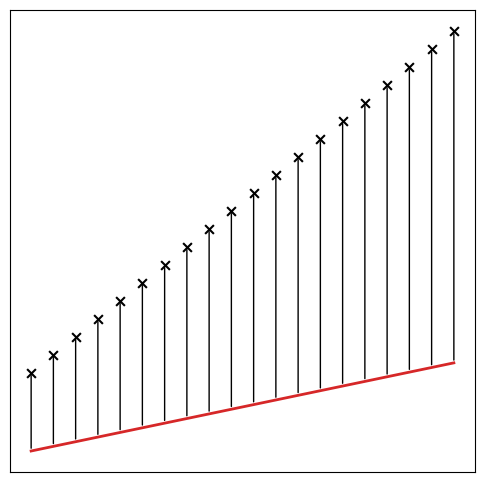

In [74]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x, y, marker='x', s=40, color='k')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.plot(x, hypothesis(x, *theta[1]), color=colors[3], lw=2,
          label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[j]))

xy1 = np.vstack((x,y))
xy2 = np.vstack((x,hypothesis(x, *theta[1])))

for i in range(xy1.shape[1]):
  ax.annotate("",
            xy=xy1[:,i], xycoords='data',
            xytext=xy2[:,i], textcoords='data',
            arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

ax.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
              labelbottom=False,labeltop=False,labelleft=False,labelright=False);
ax.set(xlabel=None, ylabel=None)
plt.savefig('fit-plot-error.png', bbox_inches='tight', dpi=600)

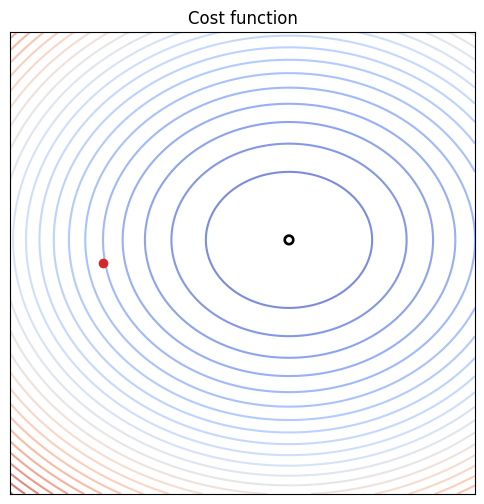

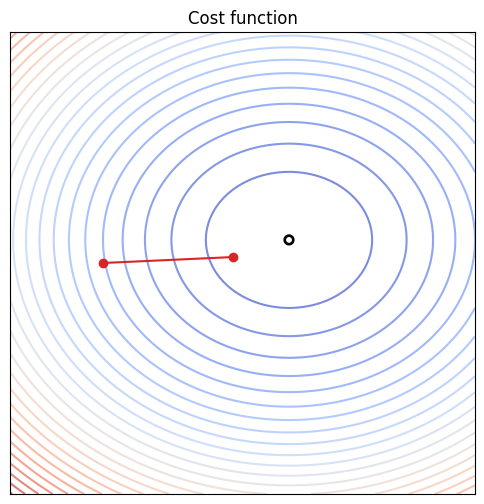

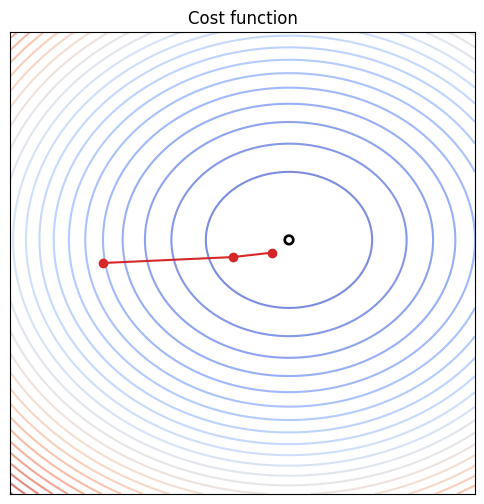

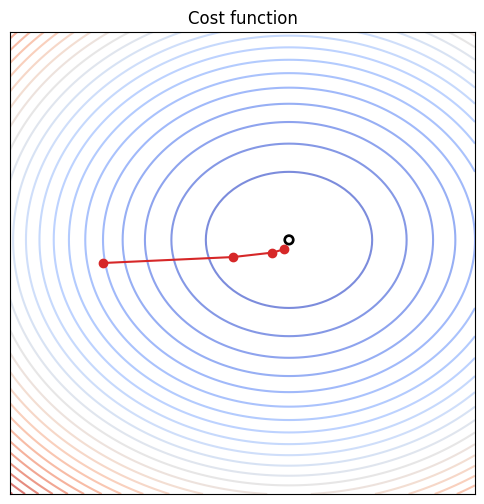

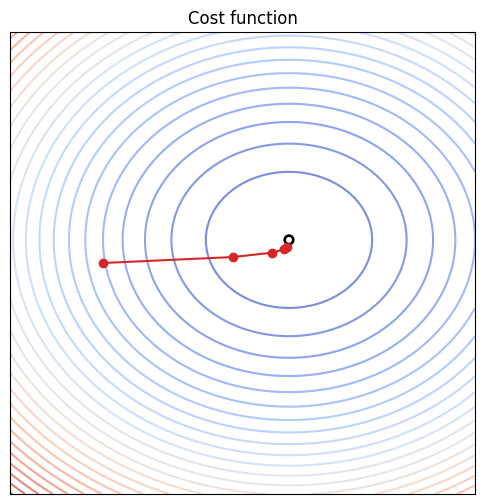

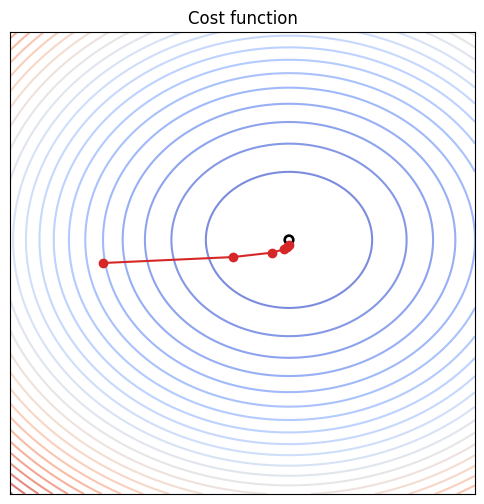

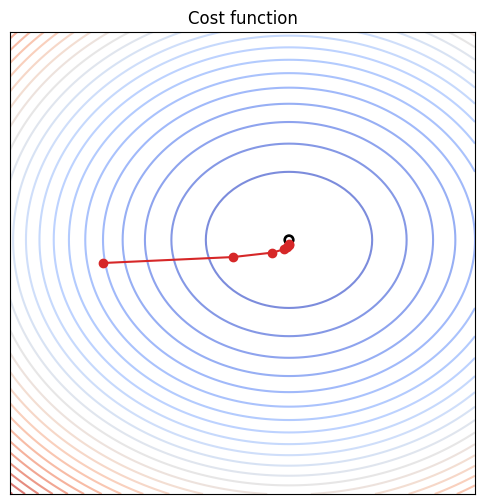

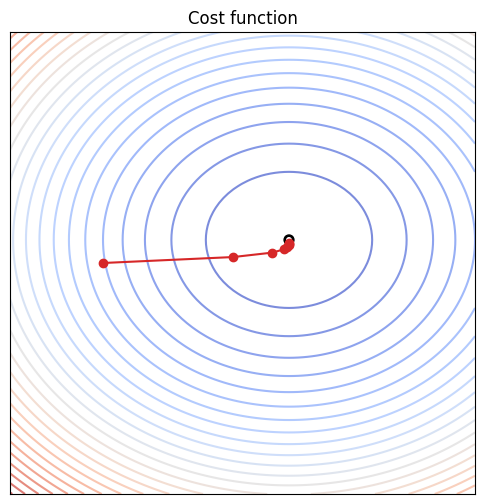

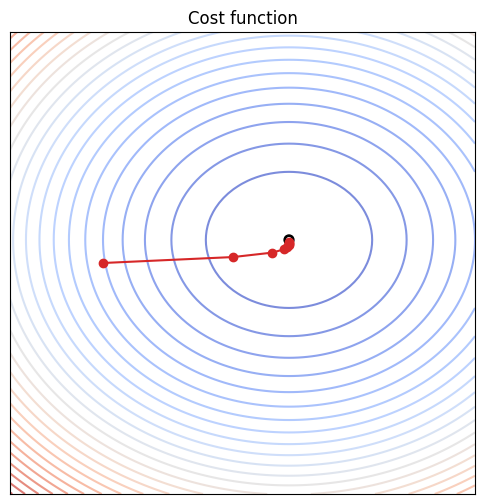

In [37]:
# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[np.newaxis,:,np.newaxis],
                   theta1_grid[:,np.newaxis,np.newaxis])

X, Y = np.meshgrid(theta0_grid, theta1_grid)

for j in range(1,N):
  fig, ax = plt.subplots(figsize=(6,6))
  contours = ax.contour(X, Y, J_grid, 30, cmap=cm.coolwarm, alpha=0.7)
  ax.scatter([a_true]*2,[b_true]*2,s=[50,10], color=['k','w'])
  ax.plot(*zip(*theta[:j]), marker='o', color=colors[3])

  # Labels, titles and a legend.
  ax.set_xlabel(r'$\theta_0$')
  ax.set_ylabel(r'$\theta_1$')
  ax.set_title('Cost function')
  ax.set_xlim(-1,4)
  ax.set_ylim(-5,5)

  ax.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,labelright=False);
  ax.set(xlabel=None, ylabel=None)
  plt.savefig('sgd-plot-'+str(j)+'.png', bbox_inches='tight', dpi=600)


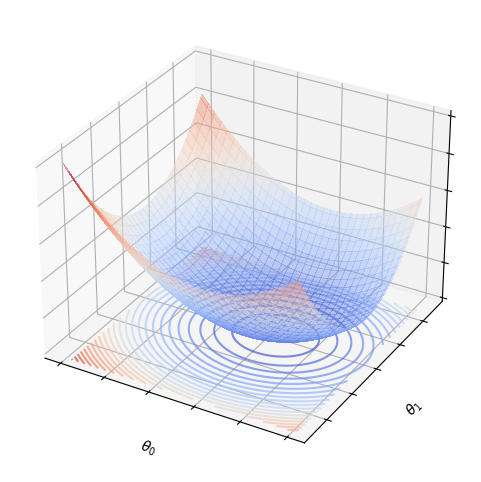

In [40]:
fig1, ax1 = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(6,6))

Z = J_grid

# Plot the surface.
surf = ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.4)
ax1.contour(X, Y, Z, zdir='z', offset=-0.5, cmap='coolwarm', levels=30, alpha=0.7)

ax1.set_xlabel(r'$\theta_0$')
ax1.set_ylabel(r'$\theta_1$')
ax1.set_zlabel('Cost function')


ax1.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,labelright=False);
plt.savefig('sgd-plot-3D.png', bbox_inches='tight', dpi=600)
